In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [14]:
# df = pd.read_csv("sample_data/cleveland.data", delim_whitespace=True, encoding='utf-8', on_bad_lines='skip')
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart = pd.read_csv("processed.cleveland2.csv", names=column_names, na_values=["?"])
heart[['trestbps']]=heart[['trestbps']].replace(0,np.nan)
heart[['chol','thalach']]=heart[['chol','thalach']].replace(99999,np.nan)
heart.dropna(inplace=True)

In [15]:
heart.dropna(inplace=True)

In [16]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145.0,233.0,1,2,150.0,0,2.3,3,0.0,6.0,0
1,67,1,4,160.0,286.0,0,2,108.0,1,1.5,2,3.0,3.0,2
2,67,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2.0,7.0,1
3,37,1,3,130.0,250.0,0,0,187.0,0,3.5,3,0.0,3.0,0
4,41,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0.0,3.0,0


In [17]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000,291.000000
mean,54.742268,0.676976,3.158076,132.065292,247.219931,0.147766,0.996564,149.326460,0.329897,1.068041,1.604811,0.680412,4.766323,0.955326
std,8.884638,0.468437,0.966202,17.662522,52.189374,0.355480,0.994808,22.702422,0.470985,1.172784,0.620215,0.941895,1.942368,1.235145
min,34.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.500000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.500000,0.000000,2.000000,165.000000,1.000000,1.800000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [18]:
heart['num'].value_counts()

0    155
1     54
2     35
3     34
4     13
Name: num, dtype: int64

In [19]:
# checking for missing values
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [20]:
X = heart.drop(columns='num', axis=1)
Y = heart['num']

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=6) 
fit = test.fit(X, Y) 
print(fit.scores_)
features=fit.transform(X)
print(features)

[ 22.96687122   7.38687494  16.20662173  18.70569294  38.74499189
   6.8585685   12.36006783 206.77186149  36.4174123   96.38822094
   9.93883778 102.87836814  69.14745174]
[[233.  150.    0.    2.3   0.    6. ]
 [286.  108.    1.    1.5   3.    3. ]
 [229.  129.    1.    2.6   2.    7. ]
 ...
 [193.  141.    0.    3.4   2.    7. ]
 [131.  115.    1.    1.2   1.    7. ]
 [236.  174.    0.    0.    1.    3. ]]


In [23]:
X_new = heart[['chol','thalach','exang','oldpeak','ca','thal']]

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(291, 13) (232, 13) (59, 13)


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

In [27]:
# setting up the layers of Neural Network
import keras


model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(13,)),
                          keras.layers.Dense(30, activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          #keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(5, activation='sigmoid')
])

In [28]:
# compiling the Neural Network
learning_rate = 0.001
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss='mse',
              metrics=['accuracy'])

In [29]:
# training the Meural Network

history = model.fit(X_train_std, Y_train, batch_size=40, validation_split=0.3, epochs=10)

Epoch 1/10
5/5 [==============================] - 1s 42ms/step - loss: 1.7200 - accuracy: 0.1728 - val_loss: 1.7016 - val_accuracy: 0.1429
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 1.6709 - accuracy: 0.2037 - val_loss: 1.6619 - val_accuracy: 0.1857
Epoch 3/10
5/5 [==============================] - 0s 8ms/step - loss: 1.6316 - accuracy: 0.2469 - val_loss: 1.6225 - val_accuracy: 0.2429
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 1.5956 - accuracy: 0.2654 - val_loss: 1.5861 - val_accuracy: 0.2429
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 1.5606 - accuracy: 0.3210 - val_loss: 1.5513 - val_accuracy: 0.2857
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 1.5274 - accuracy: 0.3765 - val_loss: 1.5211 - val_accuracy: 0.4000
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 1.4949 - accuracy: 0.4074 - val_loss: 1.4892 - val_accuracy: 0.4286
Epoch 8/10
5/5 [=================

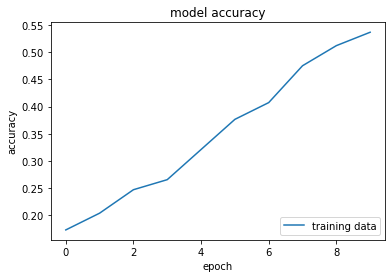

In [30]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data'], loc = 'lower right')

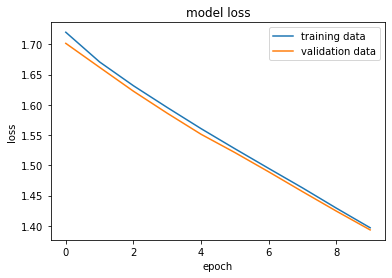

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [32]:
from sklearn.svm import SVC

svc_model = SVC(decision_function_shape='ovo')
svc_model.fit(X_train_std, Y_train)
y_train_preds = svc_model.predict(X_train_std)

In [33]:
y_preds = svc_model.predict(X_test_std)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        36
           1       0.33      0.20      0.25        10
           2       0.25      0.20      0.22         5
           3       0.50      0.43      0.46         7
           4       0.00      0.00      0.00         1

    accuracy                           0.68        59
   macro avg       0.37      0.35      0.36        59
weighted avg       0.62      0.68      0.64        59



C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
A = accuracy_score(Y_train, y_train_preds )
print(A)

0.7629310344827587


In [36]:
B= accuracy_score(Y_test, y_preds)
print(B)

0.6779661016949152


[7.51357917e-01 1.46403343e-01 8.42800469e-02 1.57698090e-02
 1.02343847e-03 3.34073308e-04 2.50883051e-04 2.24583631e-04
 1.76967865e-04 5.99657110e-05 4.67969518e-05 4.04834628e-05
 3.16915639e-05]


Text(0, 0.5, 'Explained variance')

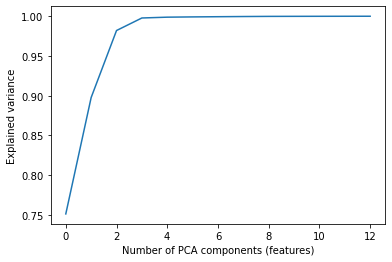

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13)
fit = pca.fit(X)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of PCA components (features)')
plt.ylabel('Explained variance')

In [38]:
pca = PCA(n_components=3)
fit = pca.fit_transform(X)
principalDf = pd.DataFrame(data = fit, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
finalDf = pd.concat([principalDf, heart[['num']]], axis = 1)
array = finalDf.values
X2	= array[:,0:3] 
Y2	= array[:,3]
X2_train, X2_validation, Y2_train, Y2_validation = train_test_split(X2, Y2, test_size=0.20, random_state=1)

In [39]:
# setting up the layers of Neural Network
import keras


model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(3,)),
                          keras.layers.Dense(35, activation='relu'),
                          keras.layers.Dense(5, activation='relu'),
                          #keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(5, activation='sigmoid')
])

In [40]:
# compiling the Neural Network
learning_rate = 0.001
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              #loss='mse',
              metrics=['accuracy'])

In [41]:
# training the Meural Network

history = model.fit(X2_train, Y2_train, batch_size=40, validation_split=0.2, epochs=10)

Epoch 1/10
1/5 [=====>........................] - ETA: 1s - loss: nan - accuracy: 0.1500

InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\myneee101\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\myneee101\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\myneee101\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\myneee101\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\myneee101\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\myneee101\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\myneee101\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\myneee101\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\myneee101\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\myneee101\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\myneee101\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\myneee101\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\myneee101\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\myneee101\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\myneee101\AppData\Local\Temp/ipykernel_304/607563943.py", line 3, in <module>
      history = model.fit(X2_train, Y2_train, batch_size=40, validation_split=0.2, epochs=10)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\myneee101\anaconda3\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of -9223372036854775808 which is outside the valid range of [0, 5).  Label values: 0 0 0 1 1 -9223372036854775808 0 1 1 0 0 1 0 0 0 2 0 0 1 0 2 -9223372036854775808 1 0 2 2 1 0 2 0 3 1 3 0 0 0 0 0 1 0
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1905]

In [267]:
from sklearn.svm import SVC

svc_model = SVC(decision_function_shape='ovo')
svc_model.fit(X2_train, Y2_train)
y_train_preds = svc_model.predict(X2_train)

In [268]:
y_preds = svc_model.predict(X2_validation)

In [269]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y2_validation, y_preds))

              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74        34
         1.0       0.00      0.00      0.00        11
         2.0       0.00      0.00      0.00         6
         3.0       0.00      0.00      0.00         8
         4.0       0.00      0.00      0.00         2

    accuracy                           0.56        61
   macro avg       0.12      0.20      0.15        61
weighted avg       0.33      0.56      0.41        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [270]:
accuracy_score(Y2_train, y_train_preds )

0.5495867768595041

In [271]:
accuracy_score(Y2_validation, y_preds)

0.5573770491803278